In [99]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
yelp_raw = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['text', 'sentiment']

In [112]:
# Bad review keywords chosed from negative reviews from the yelp_labelled.txt file.
keywords = ['not', 'nasty', 'angry', 'overpriced', 'disgusted', 'slow', 'blah', 'overwhelmed', 'poor',
           'sucks', 'grossed', 'disgust', 'bad', 'horrible', 'tasteless', 'bland', 'disaster', 'unsatisfying',
           'disappointing', 'gross', 'blandest', 'worst', 'bitches', 'overpriced', 'rude', 'stale', 'avoid',
           'rudely', 'sucked', 'blows', 'disrespected', 'soggy', 'uninspired']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

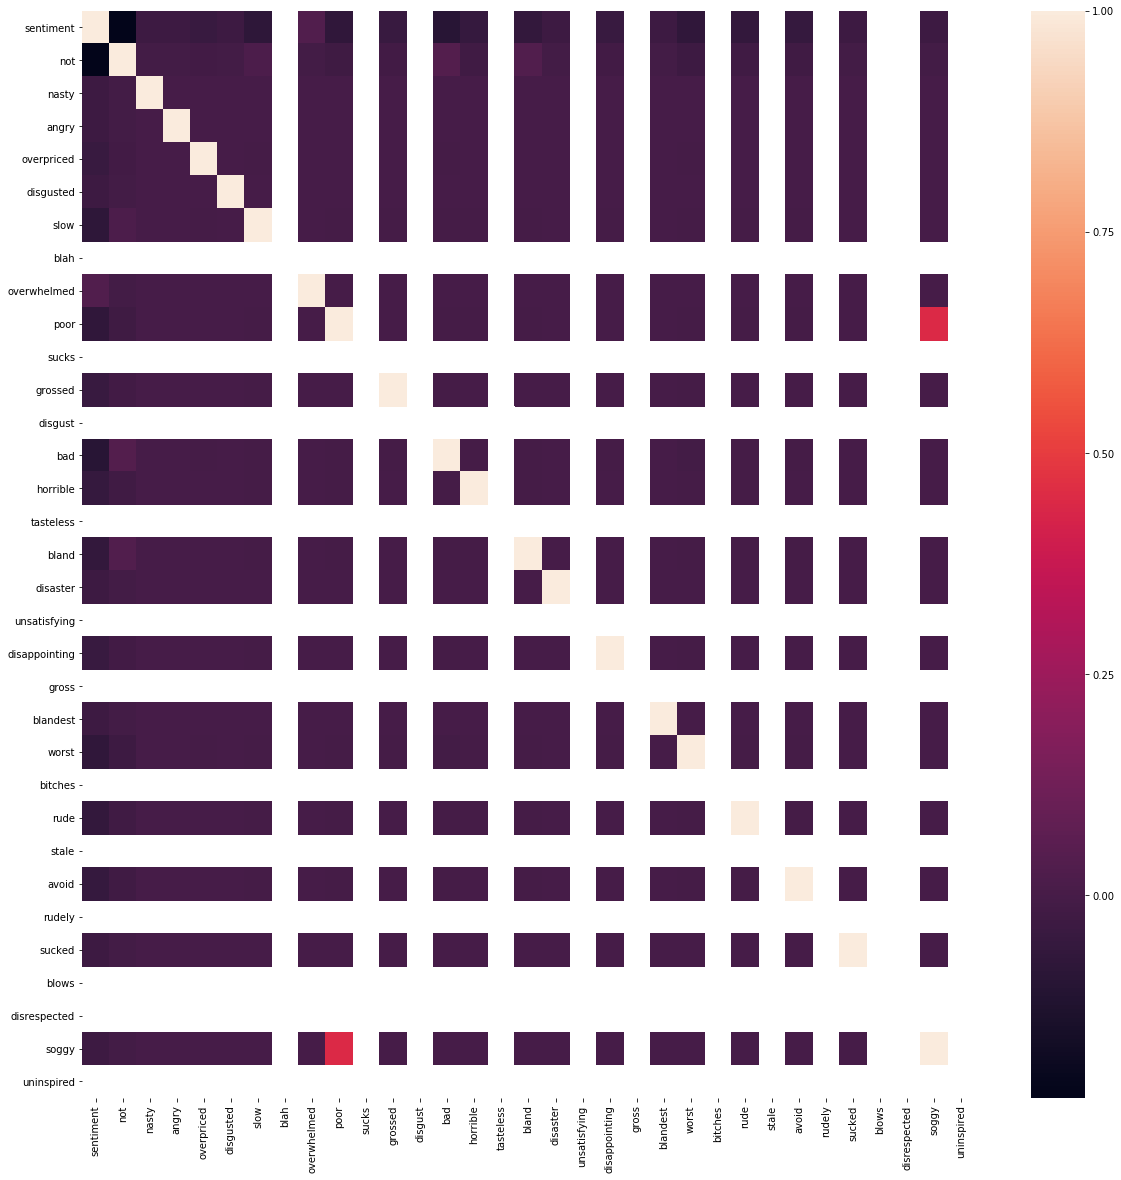

In [113]:
plt.figure(figsize=(20, 20))
sns.heatmap(yelp_raw.corr())

In [116]:
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

In [117]:
# Data is boolean, so we will use a Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Instantiate model and store in a new variable.
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()
# Fit our model to the data.
bnb.fit(data, target)
gnb.fit(data, target)
mnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
y2_pred = gnb.predict(data)
y3_pred = mnb.predict(data)
# Display results.
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y2_pred).sum()
))
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y3_pred).sum()
))

Number of negative reviews out of a total 1000 points : 382
Number of negative reviews out of a total 1000 points : 447
Number of negative reviews out of a total 1000 points : 511
